In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import NestedSampler

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Himmelblau
dims = 2
def loglike(z):
    z1 = z[:, 0]
    z2 = z[:, 1]
    return - (z1**2 + z2 - 11.)**2 - (z1 + z2**2 - 7.)**2
def transform(x):
    return 5. * x

In [6]:
# Rosenbrock
#dims = 4
#def loglike(z):
#    return np.array([-sum(100.0 * (x[1:] - x[:-1] ** 2.0) ** 2.0 + (1 - x[:-1]) ** 2.0) for x in z])
#def transform(x):
#    return 5. * x

In [7]:
# Gauss
#corr = 0.99
#dims = 2
#def loglike(x):
#    return multivariate_normal.logpdf(x, mean=np.zeros(dims), cov=np.eye(dims) + corr * (1 - np.eye(dims)))
#def transform(x):
#    return 3. * x

In [8]:
sampler = NestedSampler(dims, loglike, transform=transform, num_live_points=1000, hidden_dim=128, num_layers=1, num_blocks=5, scale='', flow='spline')

Creating directory for new run logs/test/run37
[nnest.trainer] [INFO] SingleSpeedSpline(
  (net): NormalizingFlowModel(
    (flow): NormalizingFlow(
      (flows): ModuleList(
        (0): ActNorm()
        (1): Invertible1x1Conv()
        (2): NSF_CL(
          (f1): MLP(
            (net): Sequential(
              (0): Linear(in_features=1, out_features=16, bias=True)
              (1): LeakyReLU(negative_slope=0.2)
              (2): Linear(in_features=16, out_features=16, bias=True)
              (3): LeakyReLU(negative_slope=0.2)
              (4): Linear(in_features=16, out_features=16, bias=True)
              (5): LeakyReLU(negative_slope=0.2)
              (6): Linear(in_features=16, out_features=23, bias=True)
            )
          )
          (f2): MLP(
            (net): Sequential(
              (0): Linear(in_features=1, out_features=16, bias=True)
              (1): LeakyReLU(negative_slope=0.2)
              (2): Linear(in_features=16, out_features=16, bias=True)
   

In [9]:
sampler.run()

[nnest.sampler] [INFO] MCMC steps [10]
[nnest.sampler] [INFO] Initial scale [1.4142]
[nnest.sampler] [INFO] Volume switch [-1.0000]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0032]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0189] validation loss [0.0192]
[nnest.trainer] [INFO] Epoch [50] train loss [0.0157] validation loss [0.0156]
[nnest.trainer] [INFO] Epoch [100] train loss [0.0149] validation loss [0.0150]
[nnest.trainer] [INFO] Epoch [150] train loss [0.0145] validation loss [0.0148]
[nnest.trainer] [INFO] Epoch [200] train loss [0.0143] validation loss [0.0147]
[nnest.trainer] [INFO] Epoch [250] train loss [0.0141] validation loss [0.0146]
[nnest.trainer] [INFO] Epoch [300] train loss [0.0140] validation loss [0.0146]
[nnest.trainer] [INFO] Epoch [310] ran out of patience
[nnest.trainer] [INFO] Best epoch [260] validation loss [0.0146]
[nnest.sampler] [INFO] Step [0] loglstar [-7.4298e+02] max logl [-3.5157e-02] logz [-7

[nnest.trainer] [INFO] Epoch [100] train loss [-0.0222] validation loss [-0.0217]
[nnest.trainer] [INFO] Epoch [150] train loss [-0.0225] validation loss [-0.0219]
[nnest.trainer] [INFO] Epoch [200] train loss [-0.0226] validation loss [-0.0219]
[nnest.trainer] [INFO] Epoch [250] train loss [-0.0228] validation loss [-0.0220]
[nnest.trainer] [INFO] Epoch [266] ran out of patience
[nnest.trainer] [INFO] Best epoch [216] validation loss [-0.0222]
[nnest.sampler] [INFO] Acceptance [0.5100] min ESS [1.4913] max ESS [1.9518] average jump distance [0.0201]
[nnest.sampler] [INFO] Step [4000] loglstar [-4.8434e+00] maxlogl [-3.7728e-04] logz [-1.0311e+01] vol [1.83156e-02] ncalls [22812] scale [0.2808]
[nnest.sampler] [INFO] Acceptance [0.5400] min ESS [2.6636] max ESS [2.9733] average jump distance [0.2077]
[nnest.sampler] [INFO] Step [4200] loglstar [-3.9967e+00] maxlogl [-3.7728e-04] logz [-9.5024e+00] vol [1.49956e-02] ncalls [24340] scale [0.4553]
[nnest.sampler] [INFO] Acceptance [0.5000

In [10]:
print(sampler.logz)

-5.613784713261661


In [11]:
mc = MCSamples(samples=sampler.samples, weights=sampler.weights, loglikes=sampler.loglikes)

Removed no burn in


In [12]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())

3172.615666711693
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      9.2652159E-01  3.1182452E+00 -3.8184072E+00  3.7094368E+00  two   -3.9380762E+00  3.7887007E+00  two   -4.0048126E+00  3.8416709E+00  two     p_{1}
param2      4.0910496E-01  2.4154014E+00 -3.3327511E+00  3.2609118E+00  two   -3.4950640E+00  3.3622448E+00  two   -3.5800344E+00  3.4286446E+00  two     p_{2}



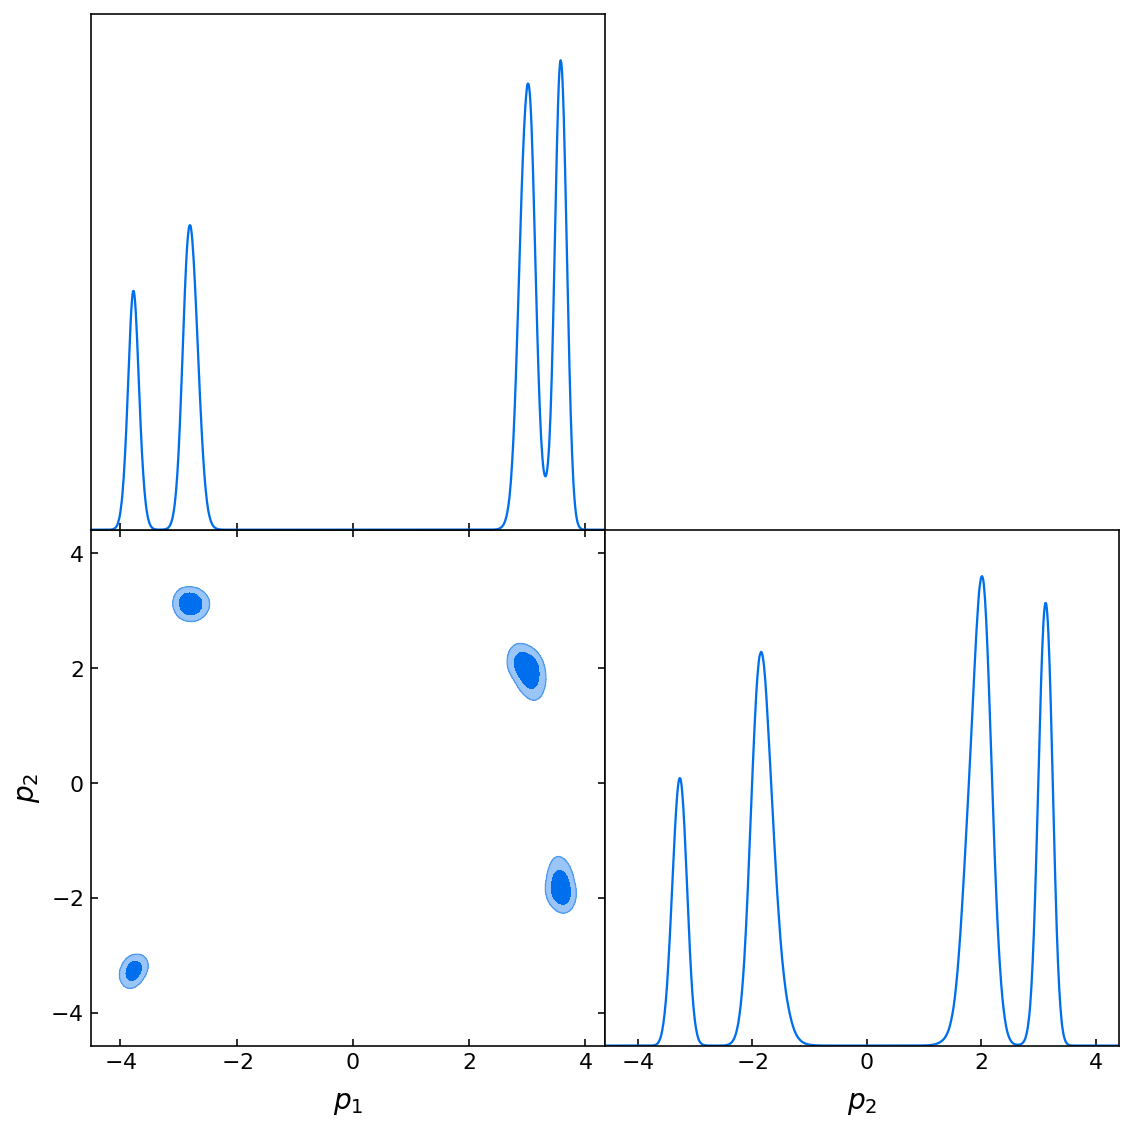

In [13]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)